## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [5]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 50.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:01<00:00, 55.4MB/s]


Посмотрим на таблицу `Ratings`.

In [6]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

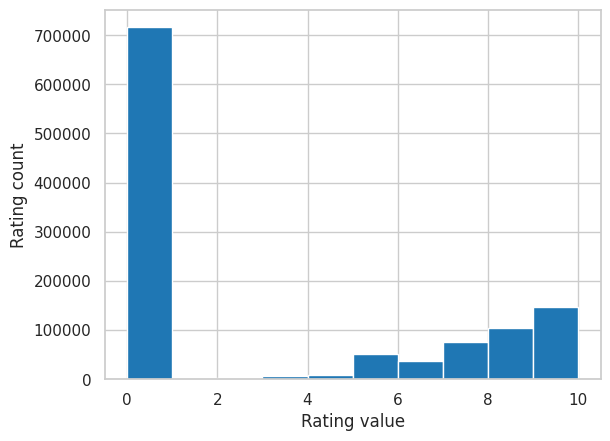

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [7]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [17]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [18]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [30]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей пропущена. Проверим, так ли это.



In [20]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Импорты

In [8]:
!pip install scikit-surprise

In [9]:
import pickle
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [10]:
ratings_copy = ratings.copy()

## Обработка данных

In [11]:
# Удалим столбцы с изображениями (они не нужны)
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

# Исправим строчки со сдвигами
missing_rows = books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]
for index, row in missing_rows.iterrows():
      parts = row['Book-Title'].split(';')
      books.at[index, 'Publisher'] = row['Year-Of-Publication']
      books.at[index, 'Year-Of-Publication'] = row['Book-Author']
      if len(parts) > 1:  # Если нашли смещение
        books.at[index, 'Book-Author'] = parts[-1]
      else:
        books.at[index, 'Book-Author'] = None

# Исправление некорректных лет публикации
current_year = pd.Timestamp.now().year
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books.loc[(books['Year-Of-Publication'] > current_year) | (books['Year-Of-Publication'] < 0), 'Year-Of-Publication'] = 2024

# Замена пропусков на "Неизвестно"
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')

# Проверка обновленных данных
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [12]:
# Исключение записей с рейтингом 0
ratings_copy = ratings_copy[ratings_copy['Book-Rating'] > 0]

# Убираем книги с единственным рейтингом
book_counts = ratings_copy['ISBN'].value_counts()
valid_books = book_counts[book_counts > 1].index
ratings_copy = ratings_copy[ratings_copy['ISBN'].isin(valid_books)]

# Убираем пользователей, оценивших только одну книгу
user_counts = ratings_copy['User-ID'].value_counts()
valid_users = user_counts[user_counts > 1].index
ratings_copy = ratings_copy[ratings_copy['User-ID'].isin(valid_users)]

# Проверка обновленных данных
ratings_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266402 entries, 16 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      266402 non-null  int64 
 1   ISBN         266402 non-null  object
 2   Book-Rating  266402 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


## Обучение SVD

In [22]:
reader = Reader(rating_scale=(1, 10))
svd_data = Dataset.load_from_df(ratings_copy[['User-ID', 'ISBN', 'Book-Rating']], reader)
train_set = svd_data.build_full_trainset()

# Подбор гиперпараметров SVD
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.1]
}
gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3)
gs.fit(svd_data)

In [23]:
# Выбор и обучение лучшей модели
svd = gs.best_estimator['mae']
svd.fit(train_set)

In [24]:
trains_set, test_set = surprise_train_test_split(svd_data, test_size=0.2, random_state=29)
predictions = svd.test(test_set)
mae_svd = accuracy.mae(predictions)

MAE:  0.8404


In [25]:
# Сохранение модели SVD
with open('svd.pkl', 'wb') as f:
    pickle.dump(svd, f)

## Обучение SGD

In [13]:
# Объединение данных рейтингов и книг
merged_data = ratings_copy.merge(books, left_on='ISBN', right_on='ISBN')

# Векторизация названий книг
vectorizer = TfidfVectorizer(max_features=100)
vectorized_titles = vectorizer.fit_transform(merged_data['Book-Title']).toarray()

# Кодирование категориальных признаков (автор, издатель, год)
categorical_features = merged_data[['Book-Author', 'Publisher', 'Year-Of-Publication']]
categorical_encoded = pd.DataFrame({
    col: pd.factorize(categorical_features[col])[0]
    for col in categorical_features
})

# Объединение всех признаков
features = pd.concat(
    [categorical_encoded, pd.DataFrame(vectorized_titles)],
    axis=1
)
features.columns = features.columns.astype(str)

# Нормализуем значения
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = merged_data['Book-Rating']

In [14]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=29)

# Обучение модели линейной регрессии
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [15]:
# Тестирование модели
y_predict = sgd.predict(X_test)
mae_sgd = mean_absolute_error(y_test, y_predict)
mae_sgd

1.451557277657236

In [16]:
# Сохранение модели линейной регрессии
with open('linreg.pkl', 'wb') as f:
    pickle.dump(sgd, f)

## Рекомендации

In [26]:
# Поиск пользователя с наибольшим количеством рейтингов "0"
user_with_most_zeros = ratings[ratings['Book-Rating'] == 0]['User-ID'].value_counts().idxmax()
zero_rated_books = ratings[(ratings['User-ID'] == user_with_most_zeros) & (ratings['Book-Rating'] == 0)]

In [27]:
# Предсказания для книг с рейтингом "0"
recommendations = []
for item_id in zero_rated_books['ISBN']:
    svd_pred = svd.predict(user_with_most_zeros, item_id).est
    if svd_pred >= 8:
        book_features = features[merged_data['ISBN'] == item_id].to_numpy()
        linreg_pred = sgd.predict(book_features)[0]
        recommendations.append((item_id, svd_pred, linreg_pred))

recommendations.sort(key=lambda x: x[2], reverse=True)

In [28]:
# Записываем рекомендации в user_recommendations.txt
with open("user_recommendations.txt", "w") as rec_file:
  for item_id, svd_pred, linreg_pred in recommendations:
    book_title = books.loc[books['ISBN'] == item_id, 'Book-Title'].values[0]
    rec_file.write(f"Book: {book_title}\nPredicted rating: {svd_pred:.2f}\nSGD rating: {linreg_pred:.2f}\n\n")

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

In [18]:
def test_svd_recs():
    with open('svd.pkl', 'rb') as f:
        loaded_svd = pickle.load(f)
    td = pd.read_csv("svd_test.csv")
    predictions = loaded_svd.test(td.values)
    mae = accuracy.mae(predictions)
    assert mae <= 1.3

def test_linreg_recs():
    with open('linreg.pkl', 'rb') as f:
        loaded_linreg = pickle.load(f)
    td = pd.read_csv("linreg_test.csv")
    y = td.pop("y")
    predictions = loaded_linreg.predict(td)
    mae = mean_absolute_error(y, predictions)
    assert mae <= 1.5

In [30]:
test_svd_recs()

MAE:  1.4508


AssertionError: 

In [29]:
test_linreg_recs()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 1004 features, but SGDRegressor is expecting 103 features as input.